In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [4]:
class Graph:
    def __init__(self):
        self.structure ={}
        self.poss={}
    
    
    def addNode(self,nodeName,pos):
        if nodeName not in self.structure:
            self.structure[nodeName]=[]
            self.poss[nodeName]=pos
            
    
    def addEdge(self,a,b,weight):
        self.structure[a].append([b,weight])
        





class GraphVisualization:
    def __init__(self,graph_):
        self.poss=graph_.poss
        self.graph=graph_.structure
        self.visual = []
        self.weight=[]

    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
         
    def visualize(self,):
        for i in self.graph.keys():
            for j in self.graph[i]:
                self.addEdge(i,j[0])
                self.weight.append(j[1])
        
        G = nx.MultiDiGraph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G,node_color='blue',pos=self.poss)
        plt.rcParams['figure.figsize'] = [20, 20]
        plt.show()
        

class MultiGraphVisualization:
    colors=['blue','red','green','yellow','orange','brown','purple','olive','gold','violet']
    def __init__(self,graphs):
        self.graphs=graphs
        self.poss=[graph.poss for graph in graphs]
        self.visual = [[] for i in graphs]
        self.weight=[[] for i in graphs]
        
        
    def addEdge(self,a,b,index):
        temp=[a,b]
        self.visual[index].append(temp)
    
    def visualize(self):
        for e,graph in enumerate(self.graphs):
            for i in graph.structure.keys():
                for j in graph.structure[i]:
                    self.addEdge(i,j[0],e)
                    self.weight[e].append(j[1])
        G=[nx.DiGraph(self.visual[t]) for t in range(len(self.graphs))]
        
        #scalefactor = 0.1
        
        #Gpos = [nx.spring_layout(r) for r in G]
        for x,q in enumerate(G):
            nx.draw_networkx(q,edge_color=self.colors[x],with_labels=True,pos=self.poss[x])
        plt.rcParams['figure.figsize'] = [30, 30]
        plt.show()
        plt.close()
        
        
        



In [7]:
## Load the sensor locations
with open('sensors.pkl', 'rb') as file:
    loc = pickle.load(file) 
    loc = np.array(loc) # sensor locations are stored in loc



In [8]:



def sensorSearch(x,y):
    for a,sensor in enumerate(loc):
        if sensor[0]==x and sensor[1]==y:
            return [True,a]
    
    return [False,-1]


def findNearestEdge(start,flag):
    flag_=loc[np.array(flag)==0]
    if len(flag_)==0:
        return [0,sensorSearch(start['x'],)]
    
        
    lastLocation=[]
    temp=((flag_[0][0]-start['x'])**2 + (flag_[0][1]-start['y'])**2)**(1/2)
    lastLocation.append(flag_[0][0])
    lastLocation.append(flag_[0][1])
    for sensor in flag_:
        distance = ((sensor[0]-start['x'])**2 + (sensor[1]-start['y'])**2)**(1/2)
        if distance<temp:
            temp=distance
            lastLocation=[]
            lastLocation.append(sensor[0])
            lastLocation.append(sensor[1])
    location =sensorSearch(lastLocation[0],lastLocation[1])[1]
    return [temp,location]
    
    
        
    

        
        
def calculateDistance(firstLocation,secondLocation):
    return ((firstLocation['x']-secondLocation['x'])**2 + (firstLocation['y']-secondLocation['y'])**2)**(1/2)

def sensorSearch(x,y):
    for a,sensor in enumerate(loc):
        if sensor[0]==x and sensor[1]==y:
            return [True,a]
    
    return [False,-1]

#
def findNearestEdge_(start,flag):
    flag_=loc[np.array(flag)==0]
    if len(flag_)==0:
        return [0,sensorSearch(start['x'],start['y'])[1],[start['x'],start['y']]]
    
        
    lastLocation=[]
    temp=((flag_[0][0]-start['x'])**2 + (flag_[0][1]-start['y'])**2)**(1/2)
    lastLocation.append(flag_[0][0])
    lastLocation.append(flag_[0][1])
    for sensor in flag_:
        distance = ((sensor[0]-start['x'])**2 + (sensor[1]-start['y'])**2)**(1/2)
        if distance<temp:
            temp=distance
            lastLocation=[]
            lastLocation.append(sensor[0])
            lastLocation.append(sensor[1])
    location =sensorSearch(lastLocation[0],lastLocation[1])[1]
    return [temp,location,lastLocation]






In [16]:



def single_route():
    pathName=0
    totalPath=0
    totalDistanceTraveled=0
    currentLocation_=-1
    flagLoc=[0 for i in range(len(loc))]
    graph=Graph()
    graph.addNode('-1',(150,150))
    for i in range(len(loc)):
        graph.addNode(f'{i}',(loc[i][0],loc[i][1]))
    currentLocation ={'x':150,'y':150}
    while True:
        if 0 not in flagLoc:
            last_=((currentLocation['x']-150)**2 + (currentLocation['y']-150)**2)**(1/2)
            totalPath+=last_
            totalDistanceTraveled+=1
            graph.addEdge(f'{currentLocation_}','-1',last_)
            g= GraphVisualization(graph)
            g.visualize()
            break
        
      #5*5 scanning :
        for scanning1 in range(currentLocation['x']-5,currentLocation['x']+6):
            for scanning2 in range(currentLocation['y']-5,currentLocation['y']+6):
                controlVariable = sensorSearch(scanning1,scanning2)
                if controlVariable[0]==True:
                    flagLoc[controlVariable[1]]=1
        
        temp1=findNearestEdge(currentLocation,flagLoc)
        totalDistanceTraveled+=1
        totalPath+=temp1[0]
        flagLoc[temp1[1]]=1
        graph.addEdge(f'{currentLocation_}',f'{temp1[1]}',temp1[0])
        currentLocation_=temp1[1]
        currentLocation['x']=loc[temp1[1]][0]
        currentLocation['y']=loc[temp1[1]][1]
    print('Total : ',totalDistanceTraveled)
        


def routes(M):
    
    graphs=[Graph() for i in range(M)]
    temp=-1
    
    for i in range(M):
        graphs[i].addNode('-1',(150,150))
    flagLoc=[0 for i in range(len(loc))] #=keeps sensors where drones don't go
    centralLocation={'x':150,'y':150}
    drones=[[centralLocation,1100,0,300] for i in range(M)]#0. index current position, 1. index remaining fuel, 2. index total path traveled
    while True:
        if 0 not in flagLoc:
            
            for i in range(M):
                if drones[i][0]!=centralLocation:
                    path=calculateDistance(drones[i][0],centralLocation)
                    drones[i][2]+=path
                    graphs[i].addNode(f'{temp}',(drones[i][0]['x'],drones[i][0]['y']))
                    graphs[i].addEdge(f'{temp}','-1',path)
            
            path_=[i[2] for i in drones]
            return [max(path_),graphs]
        for i in range(M):
            if drones[i][3]>0:
                path=findNearestEdge_(drones[i][0],flagLoc)# The shortest path found
                distanceFromCenter=calculateDistance(drones[i][0],{'x':150,'y':150})#Distance from the center
                if drones[i][1] -distanceFromCenter-path[0]>0:
                    
                    
                    
                    
                    newLocation ={'x':path[2][0],'y':path[2][1]}
                    graphs[i].addNode(f'{temp}',(drones[i][0]['x'],drones[i][0]['y']))
                    graphs[i].addNode(f'{path[1]}',(path[2][0],path[2][1]))
                    graphs[i].addEdge(f'{temp}',f'{path[1]}',path[0])
                    temp=path[1]
                    drones[i][0]=newLocation
                    drones[i][1]-=path[0]#remaining fuel is reduced
                    drones[i][2]+=path[0]#total distance traveled increases
                    drones[i][3]-=1 # The number of sensors in the drone is reduced
                    flagLoc[path[1]]=1# its value will be 1.
                else:
                    graphs[i].addNode(f'{temp}',(drones[i][0]['x'],drones[i][0]['y']))
                    graphs[i].addEdge(f'{temp}','-1',distanceFromCenter)
                    temp=-1
                    drones[i][0]=centralLocation
                    drones[i][1]=1100
                    drones[i][2]+=distanceFromCenter
                    drones[i][3]=300
            else:
                graphs[i].addNode(f'{temp}',(drones[i][0]['x'],drones[i][0]['y']))
                raphs[i].addEdge(f'{temp}','-1',distanceFromCenter)
                temp=-1
                drones[i][0]=centralLocation
                drones[i][1]=1100
                drones[i][2]+=distanceFromCenter
                drones[i][3]=300
        


        
def simplify_graph():
    y=[routes(1),routes(3),routes(5),routes(8),routes(10)]
    x=['1','3','5','8','10']
    
    plt.bar(x,list(map(lambda a:a[0],y)))
    plt.xlabel('NUMBER OF DRONES')
    plt.ylabel('TIME')
    plt.show()

    x=[1,3,5,8,10]
    var=[]
    
    for x_ in range(len(x)):
        MultiGraphVisualization(y[x_][1]).visualize()
    


    



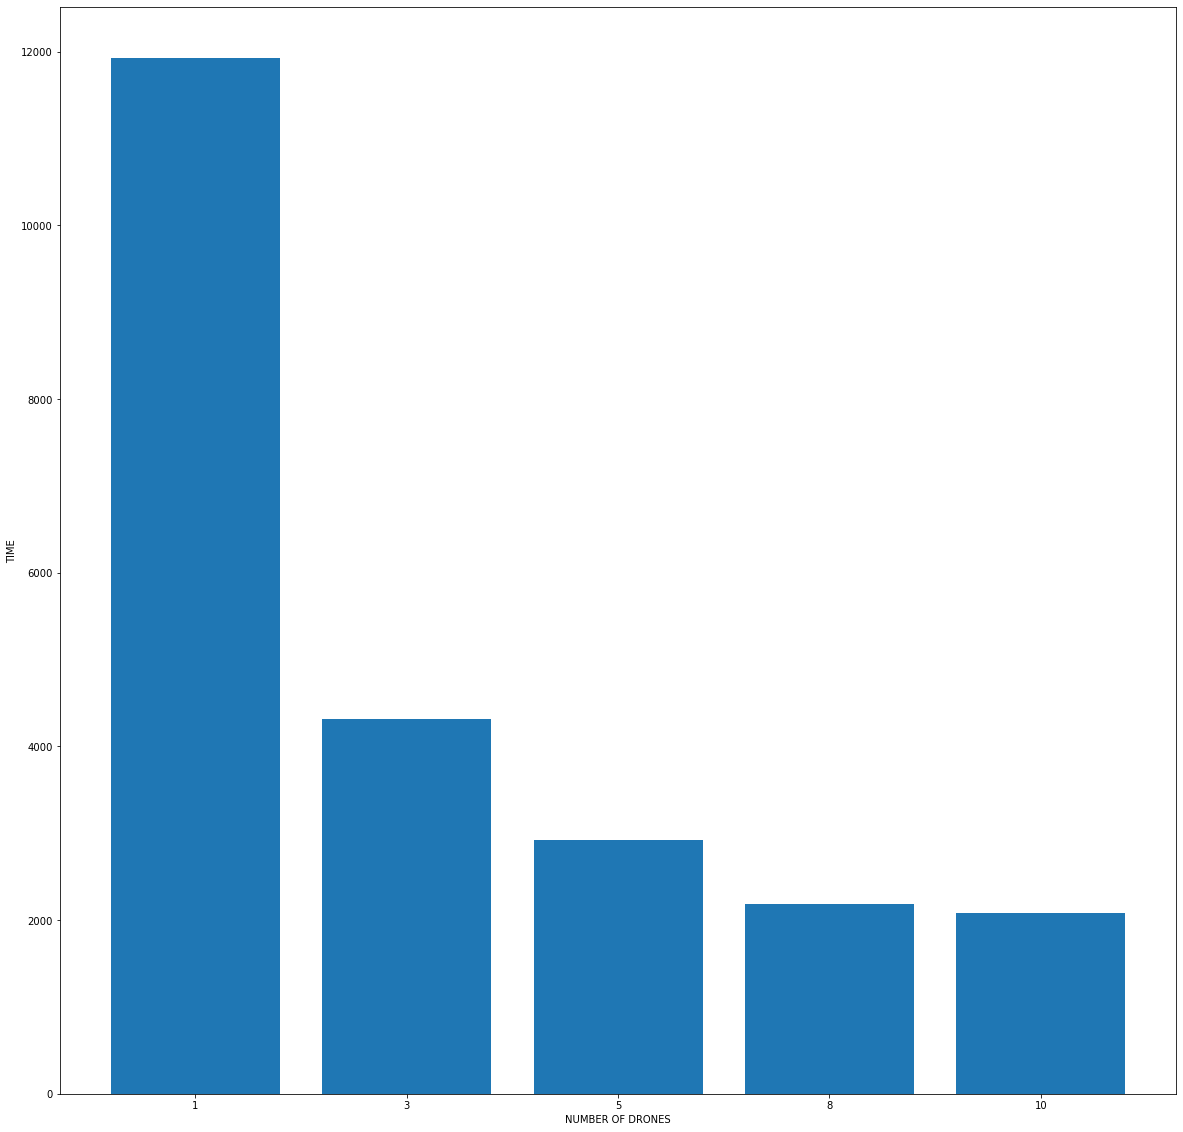

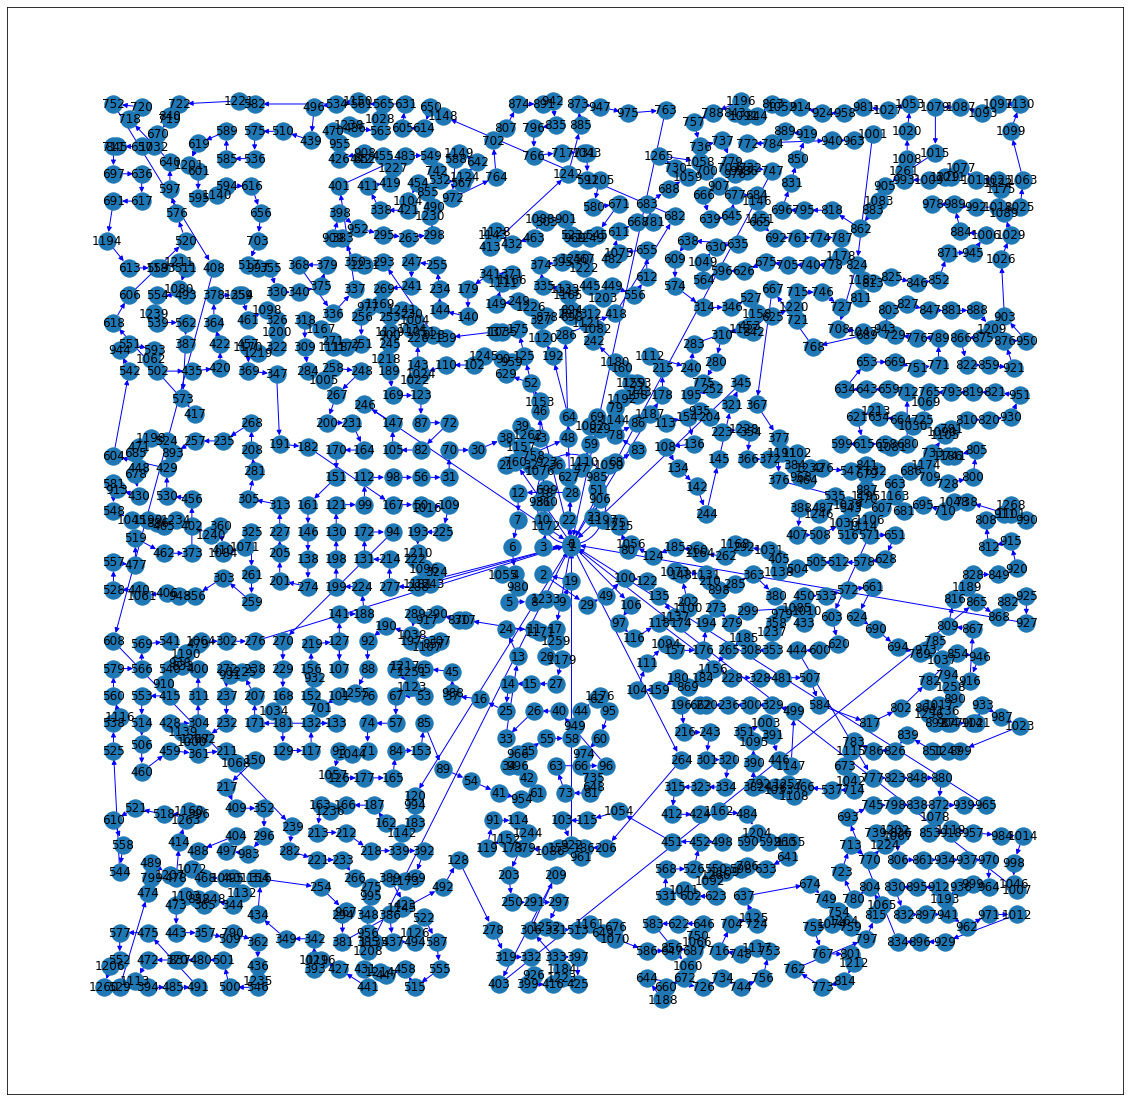

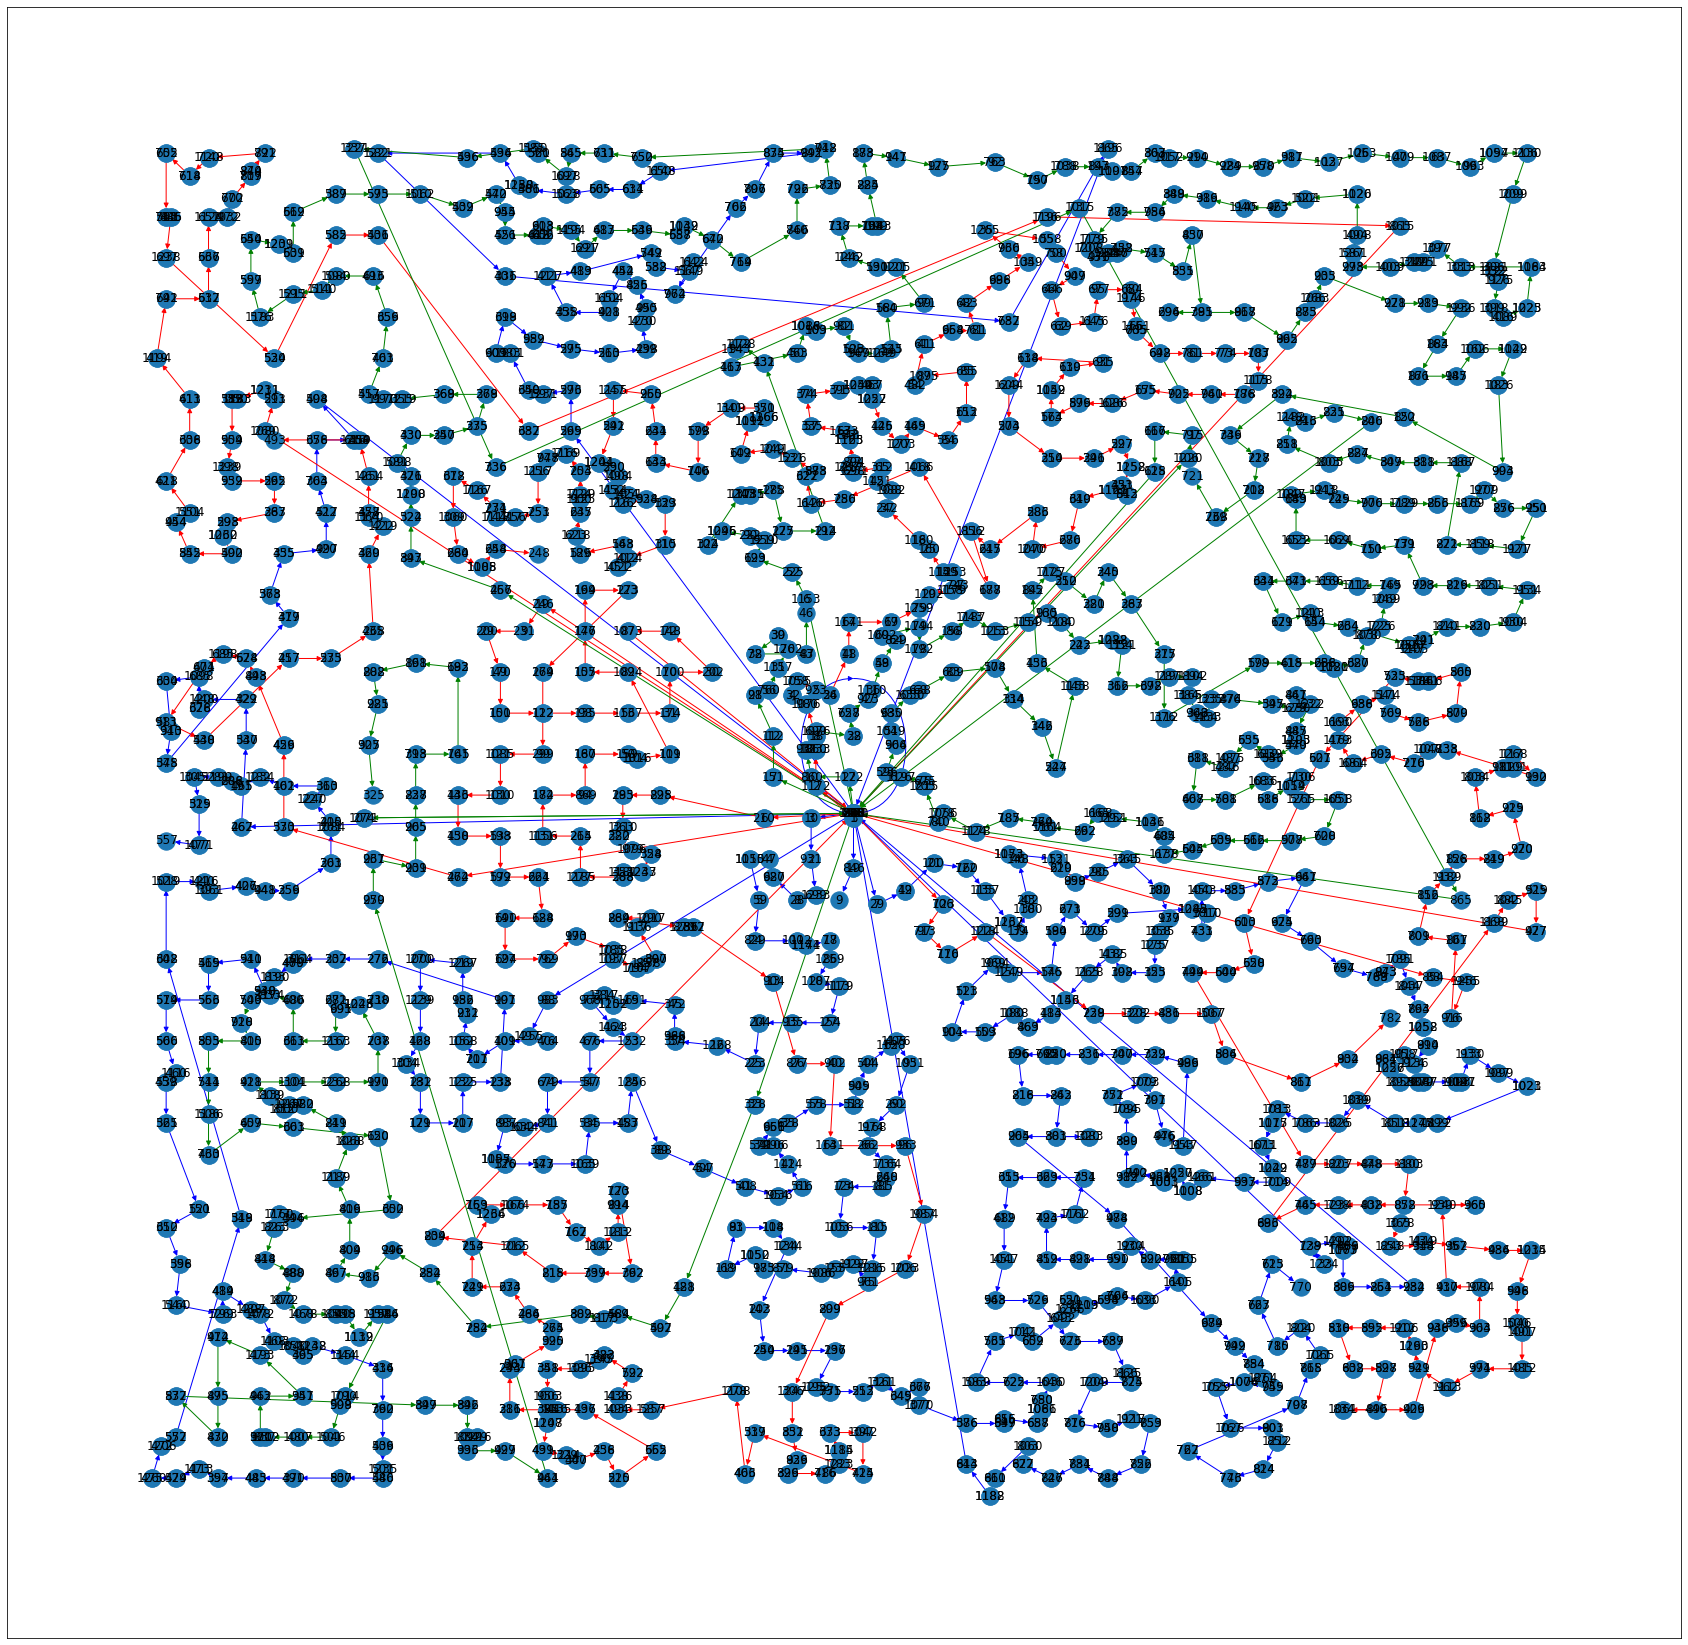

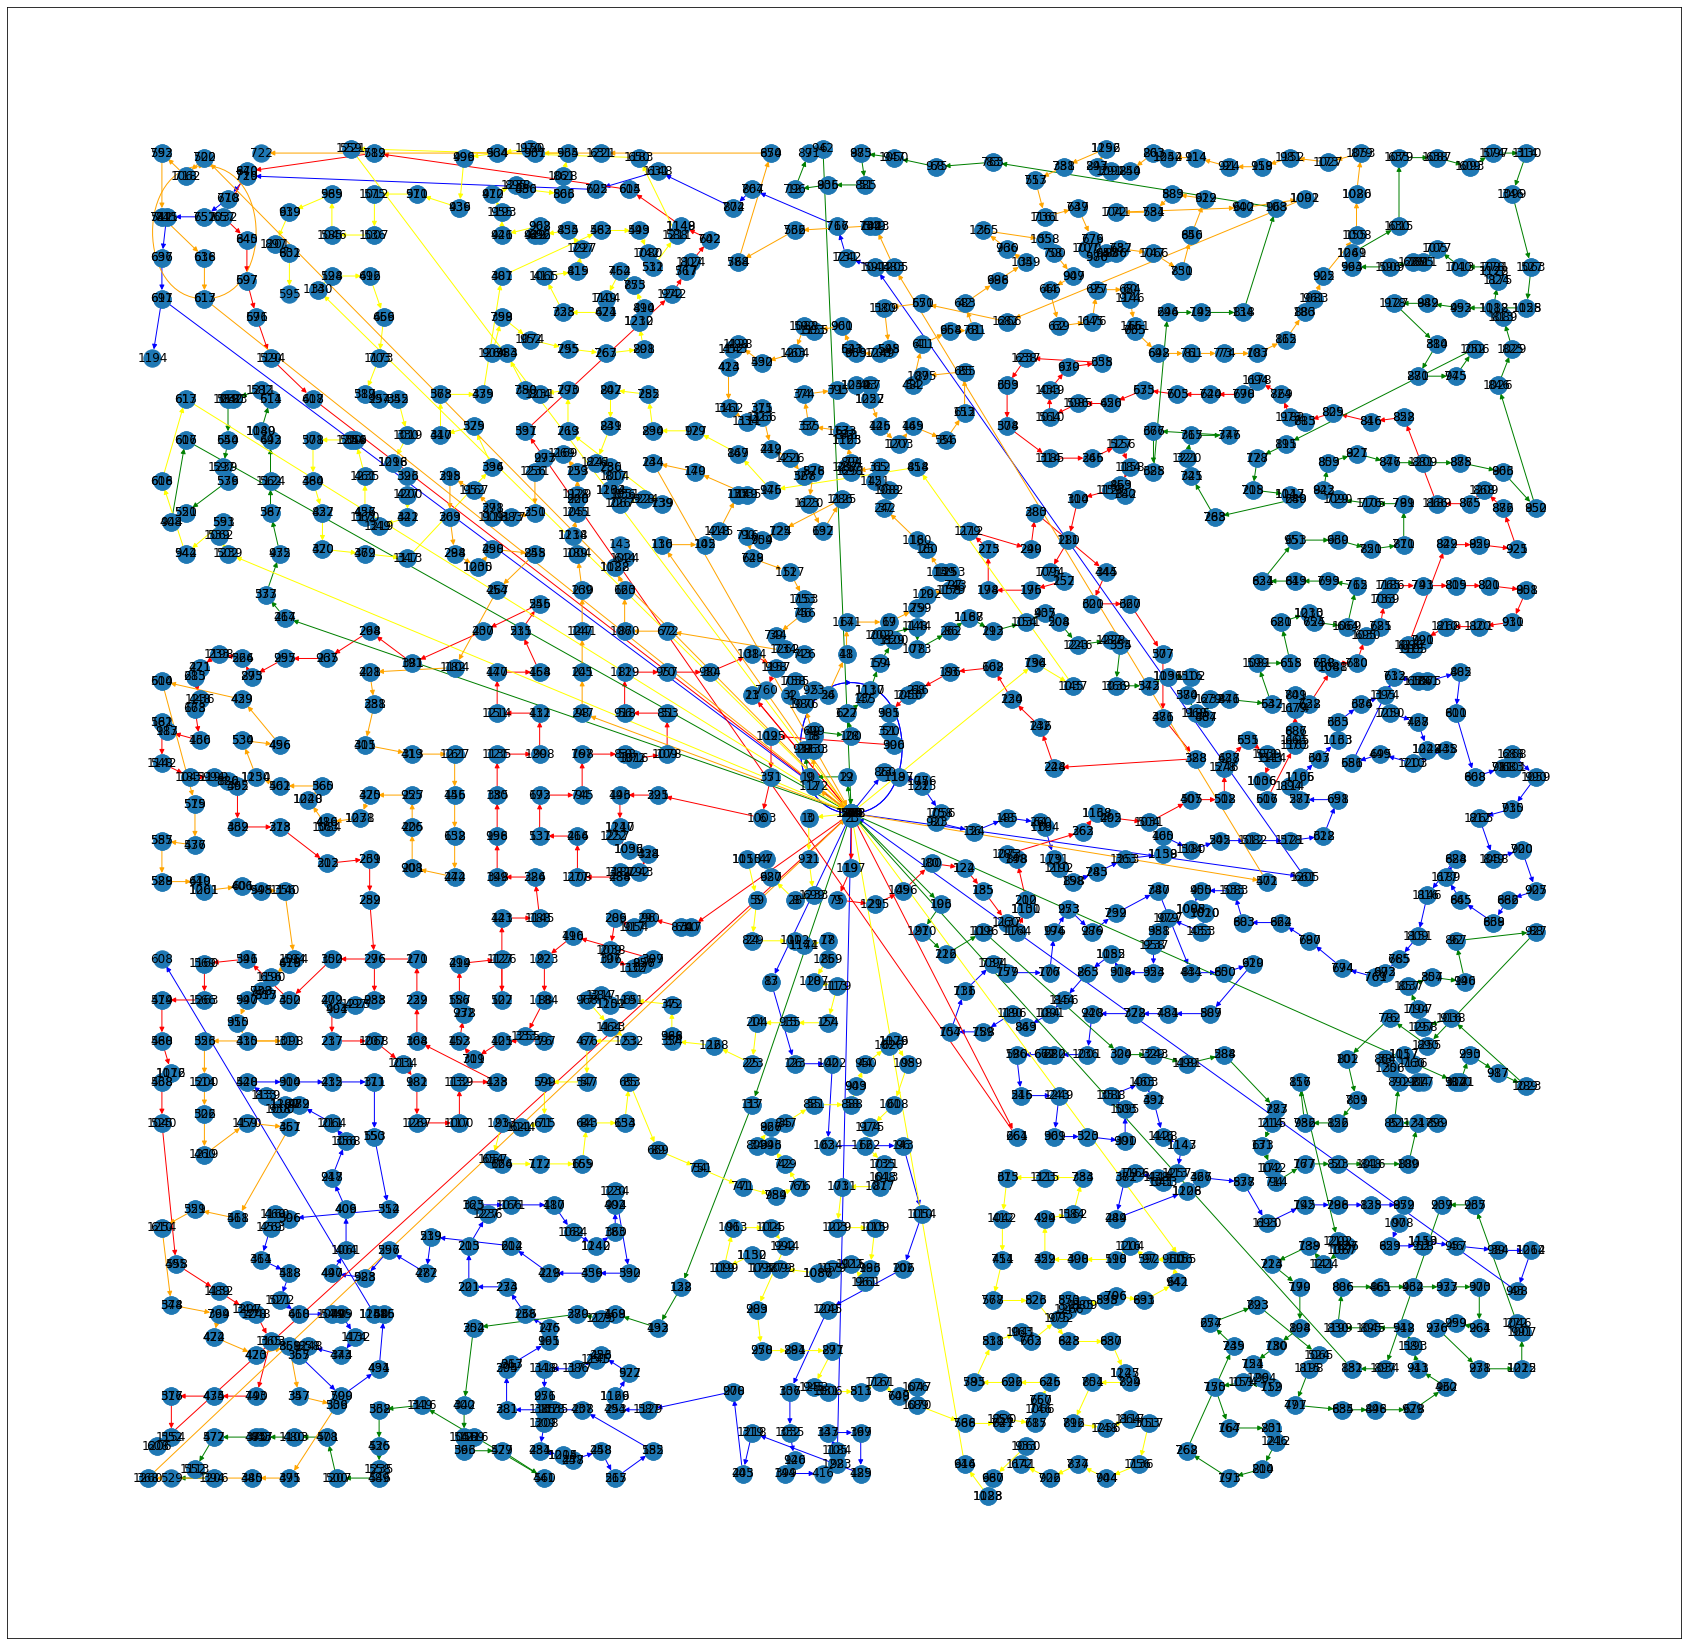

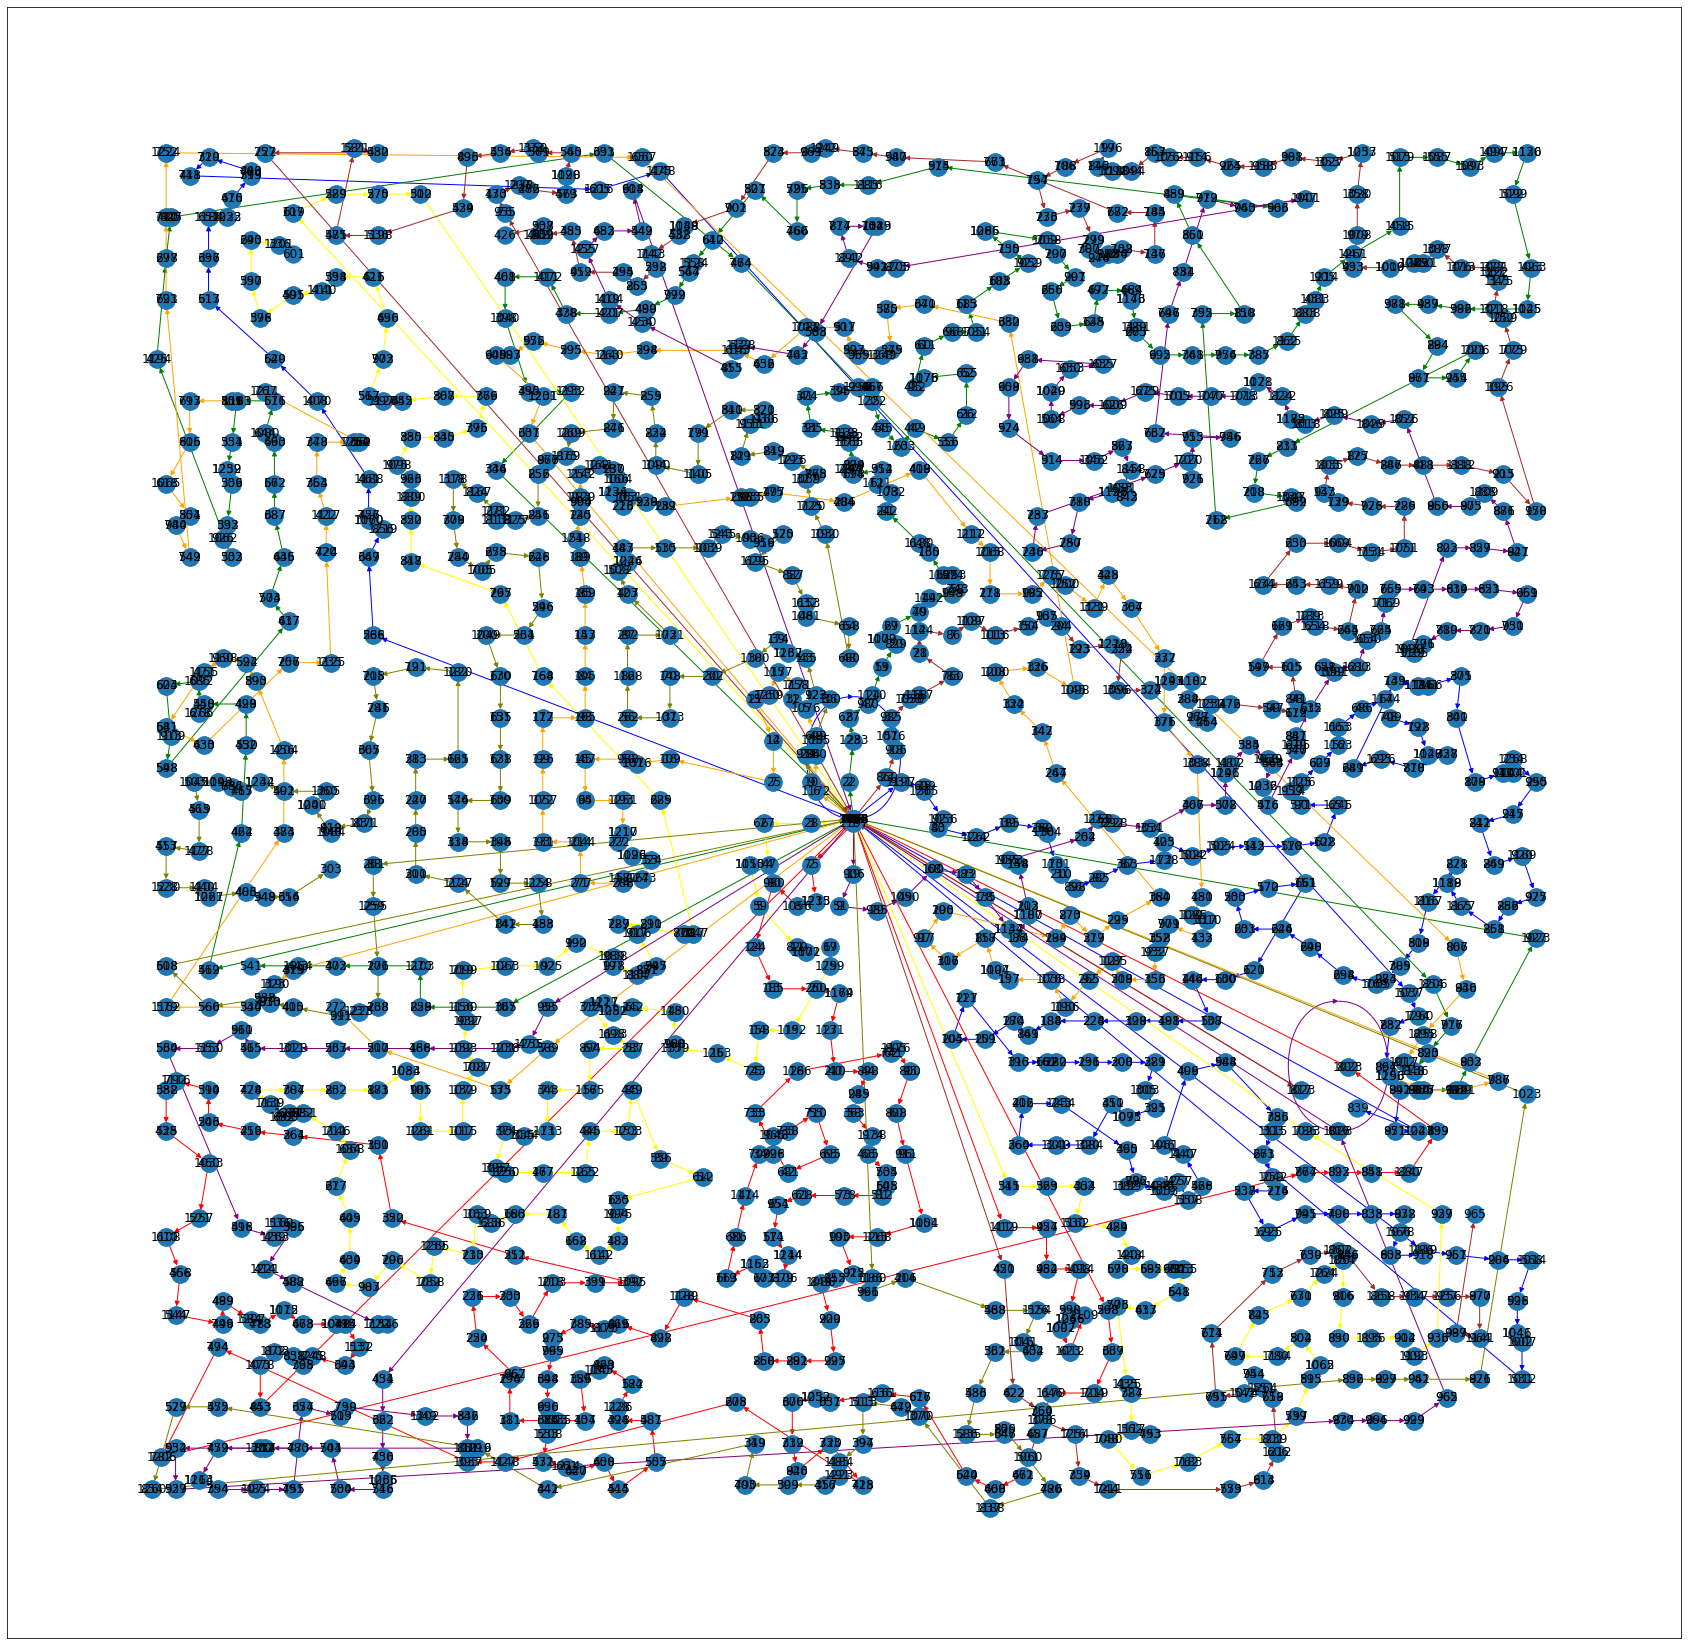

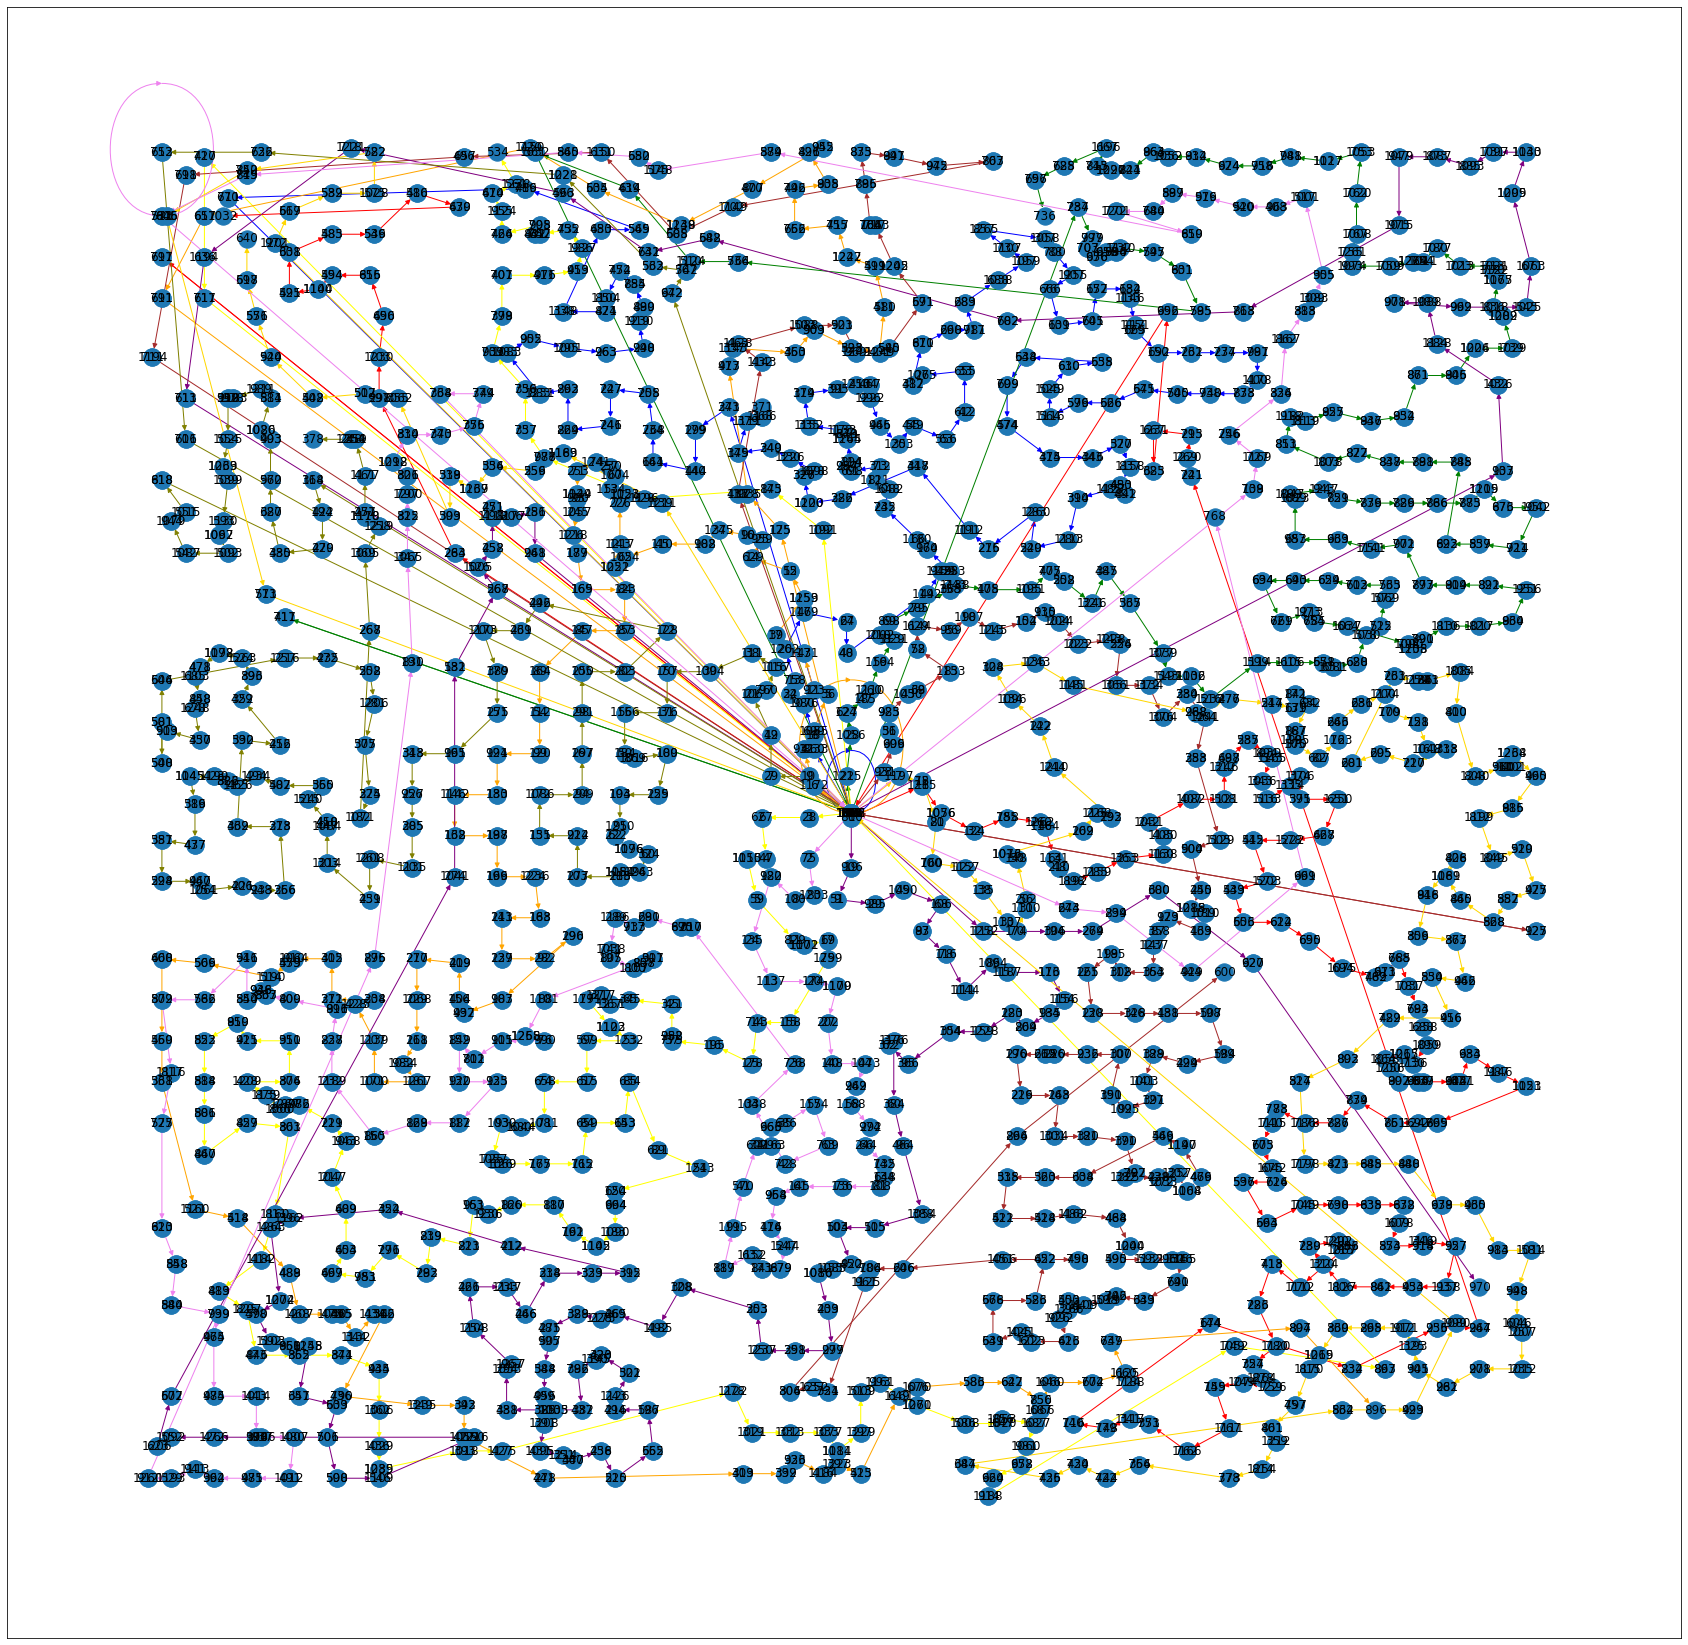

In [19]:
simplify_graph()